In [ ]:
https://gist.github.com/SamKirkiles/f17dd093f68ded1374896250ffd4625b#file-reinforce-pg-simple-py

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import copy 

#Hyperparameters
NUM_EPISODES = 10000
LEARNING_RATE = 0.000025
GAMMA = 0.99

# Create gym and seed numpy
env = gym.make('CartPole-v0')
nA = env.action_space.n
np.random.seed(1)

# Init weight
w = np.random.rand(4, 2)

# Keep stats for final print of graph
episode_rewards = []

# Our policy that maps state to action parameterized by w
def policy(state,w):
	z = state.dot(w)
	exp = np.exp(z)
	return exp/np.sum(exp)

# Vectorized softmax Jacobian
def softmax_grad(softmax):
    s = softmax.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

# Main loop 
# Make sure you update your weights AFTER each episode
for e in range(NUM_EPISODES):

	state = env.reset()[None,:]

	grads = []	
	rewards = []

	# Keep track of game score to print
	score = 0

	while True:

		# Uncomment to see your model train in real time (slower)
		#env.render()

		# Sample from policy and take action in environment
		probs = policy(state,w)
		action = np.random.choice(nA,p=probs[0])
		next_state,reward,done,_ = env.step(action)
		next_state = next_state[None,:]

		# Compute gradient and save with reward in memory for our weight updates
		dsoftmax = softmax_grad(probs)[action,:]
		dlog = dsoftmax / probs[0,action]
		grad = state.T.dot(dlog[None,:])

		grads.append(grad)
		rewards.append(reward)		

		score+=reward

		# Dont forget to update your old state to the new state
		state = next_state

		if done:
			break

	# Weight update
	for i in range(len(grads)):

		# Loop through everything that happend in the episode and update towards the log policy gradient times **FUTURE** reward
		w += LEARNING_RATE * grads[i] * sum([ r * (GAMMA ** r) for t,r in enumerate(rewards[i:])])
	
	# Append for logging and print
	episode_rewards.append(score) 
	print("EP: " + str(e) + " Score: " + str(score) + "         ",end="\r", flush=False) 



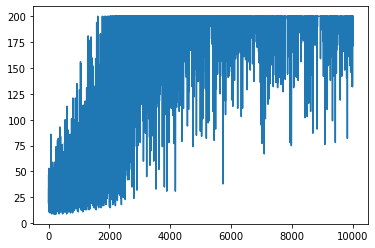

In [ ]:
plt.plot(np.arange(NUM_EPISODES),episode_rewards)
plt.show()
env.close()